In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r"C:\Users\Gowtham\Downloads\dataset.csv")

In [3]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [5]:
df["Symptoms"] = 0
records = df.shape[0]
for i in range(records):
    values = df.iloc[i].values
    values = values.tolist()
    if 0 in values:
        df["Symptoms"][i] = values[1:values.index(0)]
    else:
        df["Symptoms"][i] = values[1:]

C:\Users\Gowtham\AppData\Local\Temp/ipykernel_20536/339215335.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Symptoms"][i] = values[1:values.index(0)]


In [6]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Symptoms
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, nodal_skin_eruptions, ..."
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ skin_rash, nodal_skin_eruptions, dischromi..."
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, nodal_skin_eruptions, dischromic _..."
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, dischromic _patches, na..."
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, nodal_skin_eruptions, n..."


In [7]:
column_values = df[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17']].values.ravel()
column_values

array(['itching', ' skin_rash', ' nodal_skin_eruptions', ..., nan, nan,
       nan], dtype=object)

In [8]:
symps = pd.unique(column_values)
symps = symps.tolist()
symps = [i for i in symps if str(i) != "nan"]

In [9]:
symptoms = pd.DataFrame(columns = symps,index = df.index)
symptoms

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
symptoms["Symptoms"] = df["Symptoms"]

In [11]:
for i in symps:
    symptoms[i] = symptoms.apply(lambda x:1 if i in x.Symptoms else 0, axis=1)

In [12]:
symptoms["Disease"] = df["Disease"]

In [13]:
symptoms.head()

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Symptoms,Disease
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[itching, skin_rash, nodal_skin_eruptions, ...",Fungal infection
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[ skin_rash, nodal_skin_eruptions, dischromi...",Fungal infection
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[itching, nodal_skin_eruptions, dischromic _...",Fungal infection
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[itching, skin_rash, dischromic _patches, na...",Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[itching, skin_rash, nodal_skin_eruptions, n...",Fungal infection


In [14]:
train, test = train_test_split(symptoms,test_size=0.2)
X_train = train.drop(["Disease", "Symptoms"],axis=1)
y_train = train["Disease"].copy()
X_test = test.drop(["Disease", "Symptoms"],axis=1)
y_test = test["Disease"].copy()

In [37]:
RandomForestClassifier?

In [36]:
from sklearn.linear_model import LogisticRegression
LogisticRegression?

In [33]:
rnd_forest = RandomForestClassifier(criterion = 'entropy')
#rnd_forest.fit(X_train.values,y_train.values)

In [24]:
train['Disease'].unique()

array(['Typhoid', 'GERD', 'Paralysis (brain hemorrhage)',
       'Dimorphic hemmorhoids(piles)', 'hepatitis A',
       'Urinary tract infection', 'Dengue', 'Osteoarthristis', 'AIDS',
       'Hypothyroidism', 'Hepatitis B', 'Arthritis', 'Tuberculosis',
       'Impetigo', 'Migraine', 'Jaundice', 'Common Cold',
       'Gastroenteritis', 'Hypoglycemia', 'Hepatitis D', 'Chicken pox',
       'Acne', 'Pneumonia', 'Fungal infection', 'Varicose veins',
       'Diabetes ', 'Hyperthyroidism', 'Alcoholic hepatitis',
       'Hepatitis E', 'Drug Reaction', 'Hepatitis C', 'Hypertension ',
       'Cervical spondylosis', 'Bronchial Asthma', 'Heart attack',
       'Allergy', '(vertigo) Paroymsal  Positional Vertigo', 'Malaria',
       'Psoriasis', 'Peptic ulcer diseae', 'Chronic cholestasis'],
      dtype=object)

In [25]:
rnd_forest.estimators_[40]

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=418420158)

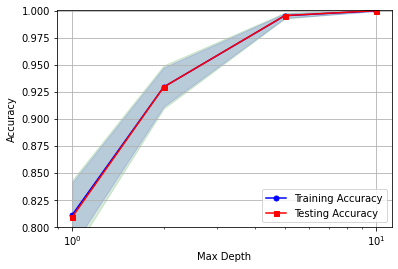

In [69]:
from sklearn.model_selection import validation_curve
param_range = [1, 2, 5, 10]
train_scores, test_scores = validation_curve(estimator = rnd_forest, 
                                            X = X_train.values, y = y_train.values,
                                            param_name = 'max_depth',
                                            param_range = param_range, cv = 10)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores , axis = 1)
test_std = np.std(test_scores, axis = 1)
plt.plot(param_range, train_mean, color = 'blue', marker = 'o', 
        markersize = 5, label = 'Training Accuracy')
plt.fill_between(param_range, train_mean+train_std, 
                 train_mean-train_std, alpha = 0.15, color = 'blue')
plt.plot(param_range, test_mean, color = 'red', marker = 's',
         markersize = 5, label = 'Testing Accuracy')
plt.fill_between(param_range, test_mean+test_std,
                 test_mean-test_std, alpha = 0.15, color = 'green')
plt.grid()
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.ylim([0.8, 1.001])
plt.savefig('depthmini', dpi = 500)
plt.show()

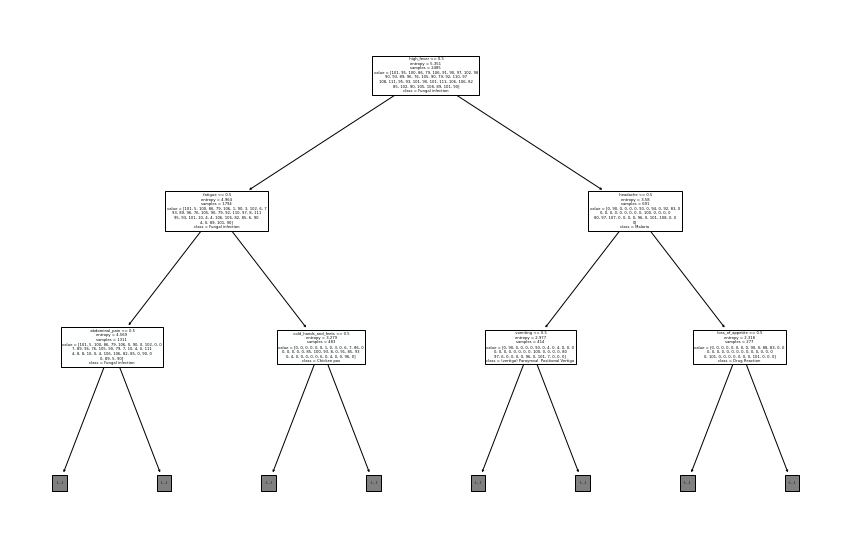

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(rnd_forest.estimators_[90],
          feature_names = s,
                    class_names= train['Disease'].unique(), max_depth = 2, filled = True)
plt.savefig('minipro.png', dpi = 500)
plt.show()

In [30]:
cross_val_score(rnd_forest,X_train.values,y_train.values,cv=10).mean()

1.0

In [30]:
y_pred = rnd_forest.predict(X_test.values)
accuracy_score(y_test.values,y_pred)

1.0

In [28]:
#### Obtaining user input
s = symptoms.columns.to_list()[:131]
print("Symptoms List:")
for i, n in enumerate(s):
    print(f'{i+1}.{n}\t', end = '')
    if((i+1)%4 == 0):
        print()
inpt = input("Enter the symptom's number accordingly(comma separated):")

Symptoms List:
1.itching	2. skin_rash	3. nodal_skin_eruptions	4. dischromic _patches	
5. continuous_sneezing	6. shivering	7. chills	8. watering_from_eyes	
9. stomach_pain	10. acidity	11. ulcers_on_tongue	12. vomiting	
13. cough	14. chest_pain	15. yellowish_skin	16. nausea	
17. loss_of_appetite	18. abdominal_pain	19. yellowing_of_eyes	20. burning_micturition	
21. spotting_ urination	22. passage_of_gases	23. internal_itching	24. indigestion	
25. muscle_wasting	26. patches_in_throat	27. high_fever	28. extra_marital_contacts	
29. fatigue	30. weight_loss	31. restlessness	32. lethargy	
33. irregular_sugar_level	34. blurred_and_distorted_vision	35. obesity	36. excessive_hunger	
37. increased_appetite	38. polyuria	39. sunken_eyes	40. dehydration	
41. diarrhoea	42. breathlessness	43. family_history	44. mucoid_sputum	
45. headache	46. dizziness	47. loss_of_balance	48. lack_of_concentration	
49. stiff_neck	50. depression	51. irritability	52. visual_disturbances	
53. back_pain	54. weakness_in_limb

In [31]:
# PreProcessing the input 
inpt = inpt.split(',')
l = []
for i,n in enumerate(s):
    if str(i+1) in  inpt:
        l.append(1)
    else:
        l.append(0)

In [32]:
dis = rnd_forest.predict([l])[0]
print(f"The type of disease the person has is:{dis}")

The type of disease the person has is:Paralysis (brain hemorrhage)
